In [169]:
#importing the packages  
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#import the dataset
data = pd.read_csv('/content/CarPrice_new.csv')

In [170]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [171]:
#Splitting company name from CarName column
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [172]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [173]:
data.CompanyName = data.CompanyName.str.lower()

def replace_name(a,b):
    data.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [175]:
data.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


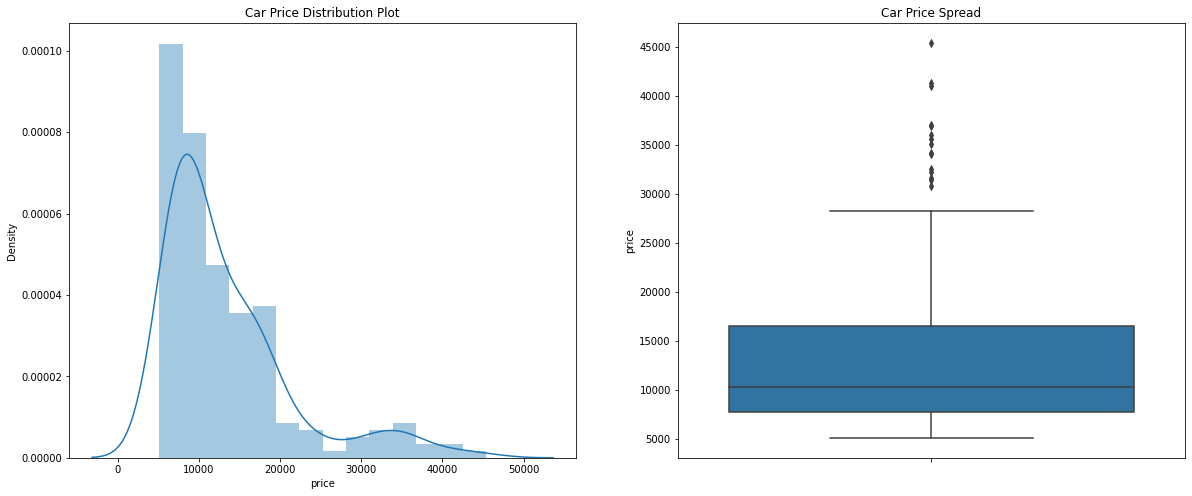

In [176]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

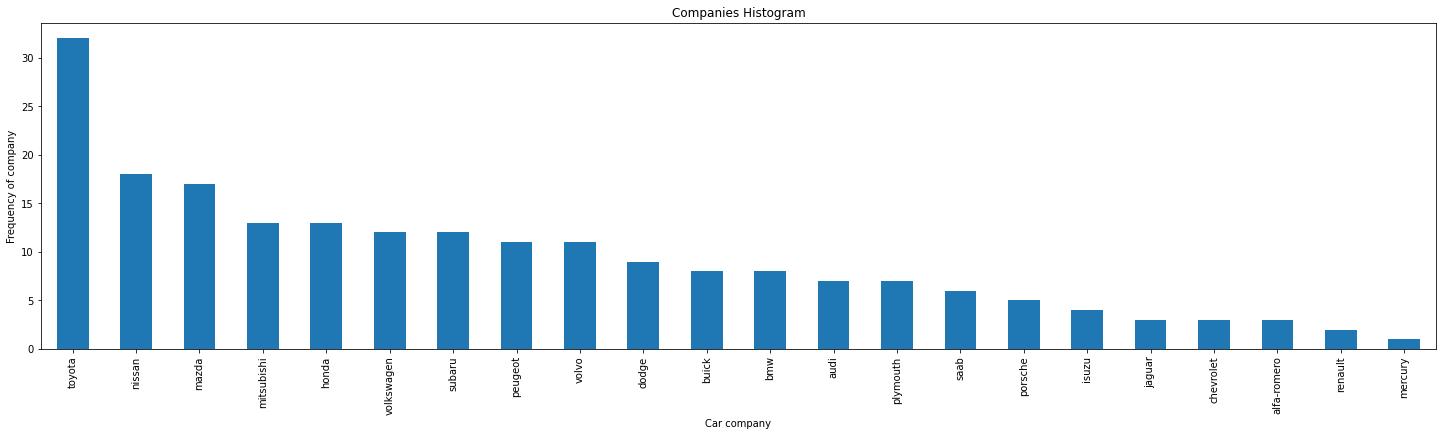

In [177]:
plt.figure(figsize=(25, 6))
plt1 = data.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')
plt.show()

In [178]:
print(data.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


(array([185.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  20.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

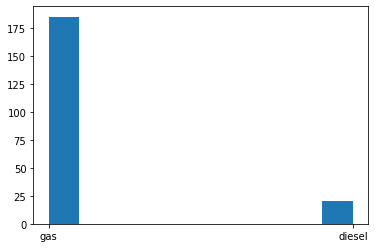

In [179]:
plt.hist(data['fueltype'])

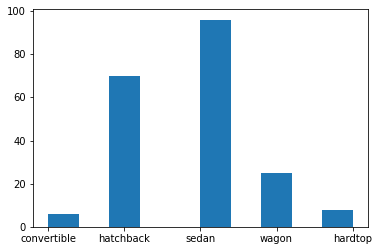

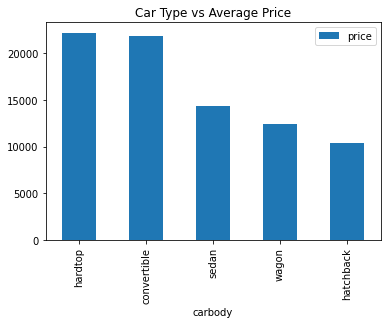

In [180]:
plt.hist(data['carbody'])

df = pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


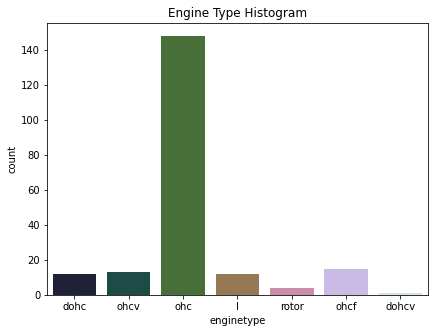

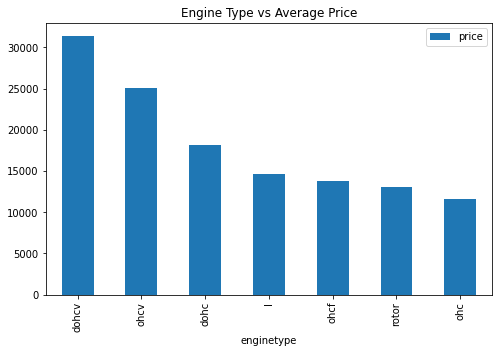

In [181]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(data.enginetype, palette=("cubehelix"))
plt.show()

df = pd.DataFrame(data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,5))
plt.title('Engine Type vs Average Price')
plt.show()

<Figure size 1800x432 with 0 Axes>

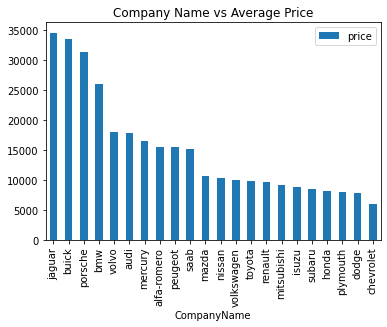

In [182]:
plt.figure(figsize=(25, 6))
df = pd.DataFrame(data.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()


In [183]:
mapping = {}
for i, category in enumerate(data['CompanyName'].unique()):
    mapping[category] = i

data['CompanyName'] = data['CompanyName'].map(mapping)

mapping = {}
for i, category in enumerate(data['fueltype'].unique()):
    mapping[category] = i

data['fueltype'] = data['fueltype'].map(mapping)

mapping = {}
for i, category in enumerate(data['aspiration'].unique()):
    mapping[category] = i

data['aspiration'] = data['aspiration'].map(mapping)

mapping = {}
for i, category in enumerate(data['doornumber'].unique()):
    mapping[category] = i

data['doornumber'] = data['doornumber'].map(mapping)

mapping = {}
for i, category in enumerate(data['carbody'].unique()):
    mapping[category] = i

data['carbody'] = data['carbody'].map(mapping)

mapping = {}
for i, category in enumerate(data['fuelsystem'].unique()):
    mapping[category] = i

data['fuelsystem'] = data['fuelsystem'].map(mapping)

mapping = {}
for i, category in enumerate(data['drivewheel'].unique()):
    mapping[category] = i

data['drivewheel'] = data['drivewheel'].map(mapping)

mapping = {}
for i, category in enumerate(data['enginelocation'].unique()):
    mapping[category] = i

data['enginelocation'] = data['enginelocation'].map(mapping)

mapping = {}
for i, category in enumerate(data['enginetype'].unique()):
    mapping[category] = i

data['enginetype'] = data['enginetype'].map(mapping)

mapping = {}
for i, category in enumerate(data['cylindernumber'].unique()):
    mapping[category] = i

data['cylindernumber'] = data['cylindernumber'].map(mapping)

In [186]:
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,0,0,0,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,0,0,1,2,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,0,0,1,2,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [188]:
data.describe (include = "all").T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
CompanyName,205.0,12.195122,6.274831,0.00,8.00,12.00,19.00,21.00
fueltype,205.0,0.097561,0.297446,0.00,0.00,0.00,0.00,1.00
aspiration,205.0,0.180488,0.385535,0.00,0.00,0.00,0.00,1.00
doornumber,205.0,0.560976,0.497483,0.00,0.00,1.00,1.00,1.00
carbody,205.0,1.800000,0.836660,0.00,1.00,2.00,2.00,4.00
drivewheel,205.0,0.673171,0.556171,0.00,0.00,1.00,1.00,2.00
enginelocation,205.0,0.014634,0.120377,0.00,0.00,0.00,0.00,1.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90


In [147]:
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [148]:
data.shape

(205, 26)

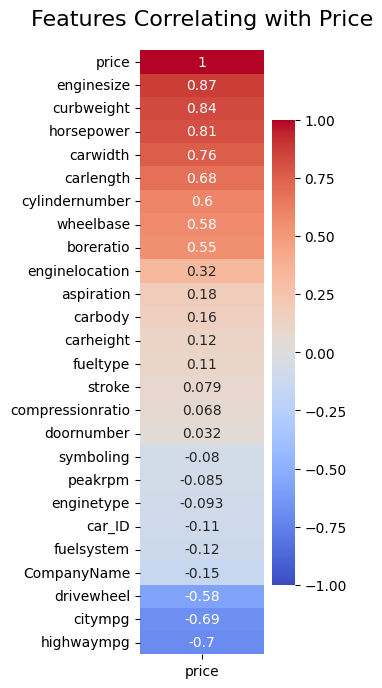

In [189]:
plt.figure (figsize = (2 , 8) , dpi = 100)
heatmap = sns.heatmap (data.corr()[['price']].sort_values (by = 'price', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')
heatmap.set_title ('Features Correlating with Price', fontdict = {'fontsize':16} , pad = 18);

In [204]:
df = data.sample(frac=1).reset_index(drop=True)

In [205]:
train_size = int(0.8 * len(df))
train_X = df.iloc[:train_size, :-1].values
train_y = df.iloc[:train_size, -1].values
test_X = df.iloc[train_size:, :-1].values
test_y = df.iloc[train_size:, -1].values

print(f"Train size: {len(train_X)}")
print(f"Test size: {len(test_X)}")
print(f"Train size: {len(train_y)}")
print(f"Test size: {len(test_y)}")


Train size: 164
Test size: 41
Train size: 164
Test size: 41


In [206]:
import numpy as np

class StandardScaler:
    def _init_(self):
        self.mean = None
        self.std = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
    
    def transform(self, X):
        return (X - self.mean) / self.std
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [207]:
#standard scalar 
sc = StandardScaler()
sc.fit(train_X)
X_train = sc.transform(train_X)
X_test = sc.transform(test_X) 
sc.fit(train_y)
y_train = sc.transform(train_y)
y_test = sc.transform(test_y)


In [208]:
class RNeuralNetwork(object):

    def __init__(self, data_matrix = None, target_variable = None, hidden = None,
                 epochs = None, learning_rate = None):
        # Create design matrix
        self.N = data_matrix.shape[0]  # assumes df is np array
        design_matrix = pd.DataFrame(data_matrix)
        design_matrix.insert(0, 'bias', np.ones(self.N))  # add column of 1's
        self.X = design_matrix
        
        # Helper variables
        D = data_matrix.shape[1]  # number of dimensions of data matrix
        M = hidden  # number of chosen hidden layers
        self.Y = target_variable.reshape(-1, 1)  # target variable
        self.epochs = epochs
        self.eta = learning_rate
        
        # Initialize random weight matrices
        self.W_1 = 0.01 * np.random.randn(D + 1, M)
        self.W_2 = 0.01 * np.random.randn(M + 1, 1)
    
    def relu(self, x):
        return np.maximum(0,x)

    def linear(self, x):
        return x 
    
    def forward_propagation(self):
        self.Z_1 = np.dot(self.X, self.W_1)
        self.A_1 = self.relu(self.Z_1)
        self.Z_2 = np.hstack((np.ones((self.N, 1)), self.A_1))  # add column of 1's for bias
        self.A_2 = np.dot(self.Z_2, self.W_2)
        self.out1 = self.linear(self.A_2)
        return self
    
    def loss_function(self):
        # calculate the loss for a current iteration
        return np.mean((self.Y - self.out1)**2)

    
    def backprop(self):
        # calculate gradient for W_2
        self.error = self.out1 - self.Y
        self.W_2_gradient = np.dot(np.transpose(self.Z_2), self.error)
       
        # calculate gradient for W_1
        self.H_prime = self.A_1  
        self.W_2_reduced = self.W_2[1:,]  # drop first row from W_2
        self.W_1_gradient = np.dot(np.transpose(self.X),
                                   (self.H_prime * np.dot(self.error,
                                                          np.transpose(self.W_2_reduced))))

        # update weights with gradient descent
        self.W_1 = self.W_1 - self.eta * self.W_1_gradient
        self.W_2 = self.W_2 - self.eta * self.W_2_gradient
        return self

    def r_squared(self):
        self.y_mean = np.mean(self.Y)
        self.ss_res = np.sum((self.Y - self.out1)**2)
        self.ss_tot = np.sum((self.Y - self.y_mean)**2)
        return 1 - (self.ss_res / self.ss_tot)
        

    def train(self):
        losses = []
        rsq=[]
        for i in range(int(self.epochs)):
            self.forward_propagation()
            self.backprop()
            loss = self.loss_function()
            losses.append(loss)
            rs=self.r_squared()
            rsq.append(rs)
            if (i % 1000) == 0:
                print('Epoch: ', i,
                      '    Loss: ', round(self.loss_function(), 4), 
                      '    R-squared: ', round(self.r_squared(), 4))
                
        plt.plot(range(len(losses)), losses)
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

        plt.plot(range(len(rsq)), rsq)
        plt.title('R_Square')
        plt.xlabel('Epochs')
        plt.ylabel('RSquare')
        plt.show()

In [215]:
ANN = RNeuralNetwork(data_matrix=X_train, target_variable=y_train,
                     hidden= 10, epochs=10000, learning_rate=0.0001)


Epoch:  0     Loss:  1.0007     R-squared:  -0.0007
Epoch:  1000     Loss:  0.0973     R-squared:  0.9027
Epoch:  2000     Loss:  0.0803     R-squared:  0.9197
Epoch:  3000     Loss:  0.0765     R-squared:  0.9235
Epoch:  4000     Loss:  0.0756     R-squared:  0.9244
Epoch:  5000     Loss:  0.0722     R-squared:  0.9278
Epoch:  6000     Loss:  0.0692     R-squared:  0.9308
Epoch:  7000     Loss:  0.0666     R-squared:  0.9334
Epoch:  8000     Loss:  0.0626     R-squared:  0.9374
Epoch:  9000     Loss:  0.0599     R-squared:  0.9401


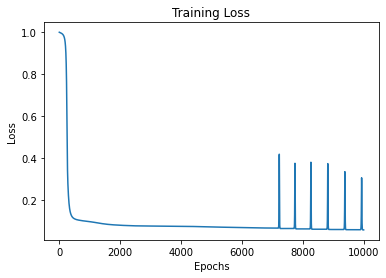

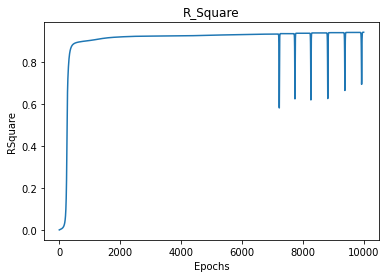

In [216]:
ANN.train()